###Fully Connected

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images/255
test_images = test_images/255

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000, 10)

In [ ]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128, activation=tf.nn.relu),
     keras.layers.Dense(10, activation=tf.nn.softmax)
])

model = keras.Sequential()
model.add(keras.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, min_delta=0.001)
]
model.fit(train_images,train_labels,batch_size=16, epochs=10, validation_data=(test_images, test_labels), callbacks = my_callbacks)

Epoch 1/10
3750/3750 [==============================] - 17s 3ms/step - loss: 0.6433 - accuracy: 0.7854 - val_loss: 0.5330 - val_accuracy: 0.8135
Epoch 2/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4663 - accuracy: 0.8394 - val_loss: 0.4791 - val_accuracy: 0.8350
Epoch 3/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4275 - accuracy: 0.8531 - val_loss: 0.4453 - val_accuracy: 0.8441
Epoch 4/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.4046 - accuracy: 0.8589 - val_loss: 0.4436 - val_accuracy: 0.8419
Epoch 5/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3860 - accuracy: 0.8666 - val_loss: 0.4445 - val_accuracy: 0.8426
Epoch 6/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3707 - accuracy: 0.8702 - val_loss: 0.4073 - val_accuracy: 0.8552
Epoch 7/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.3585 - accuracy: 0.8740 - val_loss: 0.3898 - val_ac

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4029 - accuracy: 0.8565


[0.40292099118232727, 0.8565000295639038]

###Conv

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape = (28,28,1)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
class ConvolutionLayer(keras.layers.Layer):
  def __init__(self):
      super().__init__()
      self.conv_1 = keras.layers.Conv2D(128, (3,3))
      self.pool = keras.layers.MaxPooling2D((2,2))
      self.conv_2 = keras.layers.Conv2D(64, (3,3))
      self.flatten = keras.layers.Flatten()

  def call(self, inputs):
      x = self.conv_1(inputs)
      x = tf.nn.relu(x)
      x = self.pool(x)
      x = self.conv_2(x)
      x = tf.nn.relu(x)
      x = self.pool(x)
      return self.flatten(x)

class MLP(keras.layers.Layer):
  def __init__(self):
      super().__init__()
      self.linear_1 = keras.layers.Dense(128)
      self.linear_2 = keras.layers.Dense(10)

  def call(self, inputs):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.linear_2(x)
      return tf.nn.softmax(x)

In [ ]:
'''
model = keras.Sequential([
      keras.Input(shape = (28,28,1)),
      ConvolutionLayer(),
      MLP()
])
'''
input = keras.Input(shape = (28,28,1), name="input layer")
h_c = ConvolutionLayer()(input)
y_hat = MLP()(h_c)
model = keras.Model(inputs=input, outputs = y_hat)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 convolution_layer_2 (Convol  (None, 1600)             75072     
 utionLayer)                                                     
                                                                 
 mlp_1 (MLP)                 (None, 10)                206218    
                                                                 
Total params: 281,290
Trainable params: 281,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class CobaCallback(keras.callbacks.Callback):
    def __init__(self):
        super(CobaCallback, self).__init__()
        self.train_loss = []
        self.val_loss = []
        self.train_f1 = []
        self.val_f1 = []

    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_f1.append(logs.get('f1_score'))
        self.val_f1.append(logs.get('val_f1_score'))

In [ ]:
custom_call = CobaCallback()
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, min_delta=0.001),
    tf.keras.callbacks.CSVLogger('/content/log.csv', separator=",", append=False),
    custom_call
]

In [ ]:
!pip install pip install tensorflow-addons
import tensorflow_addons as tfa
from keras import metrics
f1 = tfa.metrics.F1Score(num_classes = 10, average='macro')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy', f1])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=256, epochs=10, validation_data=(test_images, test_labels), callbacks =my_callbacks)

Epoch 1/10
  5/235 [..............................] - ETA: 3s - loss: 0.2629 - accuracy: 0.9016 - f1_score: 0.9033

235/235 [==============================] - 3s 13ms/step - loss: 0.2669 - accuracy: 0.9032 - f1_score: 0.9030 - val_loss: 0.2864 - val_accuracy: 0.8974 - val_f1_score: 0.8968
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2410 - accuracy: 0.9124 - f1_score: 0.9122 - val_loss: 0.2878 - val_accuracy: 0.8975 - val_f1_score: 0.8968
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.2277 - accuracy: 0.9170 - f1_score: 0.9168 - val_loss: 0.2787 - val_accuracy: 0.8999 - val_f1_score: 0.9001
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.2131 - accuracy: 0.9219 - f1_score: 0.9217 - val_loss: 0.2718 - val_accuracy: 0.9024 - val_f1_score: 0.9007
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1962 - accuracy: 0.9283 - f1_score: 0.9282 - val_loss: 0.2656 - val_accuracy: 0.9053 - val_f1_score: 0.9055
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1860 - ac

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2607 - accuracy: 0.9092 - f1_score: 0.9090


[0.2607361972332001, 0.9092000126838684, 0.9089983105659485]

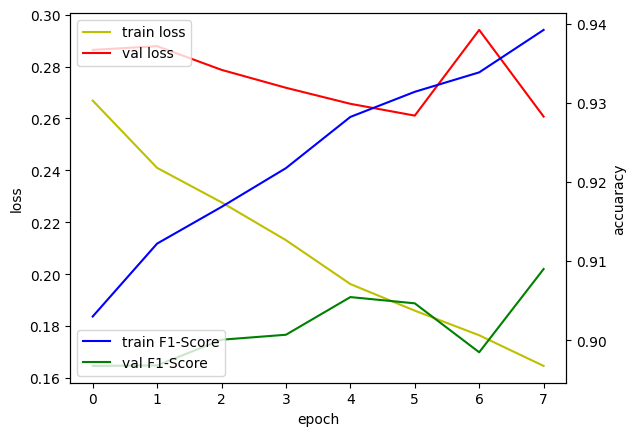

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, loss_graph = plt.subplots()

performance = loss_graph.twinx()

loss_graph.plot(custom_call.train_loss, 'y', label = 'train loss')
loss_graph.plot(custom_call.val_loss, 'r', label = 'val loss')

performance.plot(custom_call.train_f1, 'b', label = 'train F1-Score')
performance.plot(custom_call.val_f1, 'g', label = 'val F1-Score')

loss_graph.set_xlabel('epoch')
loss_graph.set_ylabel('loss')
performance.set_ylabel('accuaracy')
loss_graph.legend(loc = 'upper left')
performance.legend(loc = 'lower left')

In [ ]:
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=1)
    image = tf.image.resize(image, (28, 28))
    return image

image_path = "/content/test.png"

preprocessed_image = preprocess_image(image_path)
preprocessed_image = preprocessed_image/255
preprocessed_image= tf.reshape(preprocessed_image, (-1,28,28,1))


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predictions = model.predict(preprocessed_image)
print(class_names[tf.argmax(predictions, axis=1).numpy()[0]])

1/1 [==============================] - 0s 166ms/step
Trouser
